# Global Power Plant Database

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/output_database/global_power_plant_database.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.3220,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.6700,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.6230,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.5560,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.6410,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34931,ZMB,Zambia,Ndola,WRI1022386,50.0,-12.9667,28.6333,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,183.79,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34932,ZMB,Zambia,Nkana,WRI1022384,20.0,-12.8167,28.2000,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,73.51,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34933,ZMB,Zambia,Victoria Falls,WRI1022380,108.0,-17.9167,25.8500,Hydro,NaN,NaN,...,575.78,575.78,548.94,579.90,578.32,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
34934,ZWE,Zimbabwe,Hwange Coal Power Plant Zimbabwe,GEODB0040404,920.0,-18.3835,26.4700,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,2785.10,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1


In [3]:
df.shape

(34936, 36)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         34936 non-null  object 
 1   country_long                    34936 non-null  object 
 2   name                            34936 non-null  object 
 3   gppd_idnr                       34936 non-null  object 
 4   capacity_mw                     34936 non-null  float64
 5   latitude                        34936 non-null  float64
 6   longitude                       34936 non-null  float64
 7   primary_fuel                    34936 non-null  object 
 8   other_fuel1                     1944 non-null   object 
 9   other_fuel2                     276 non-null    object 
 10  other_fuel3                     92 non-null     object 
 11  commissioning_year              17447 non-null  float64
 12  owner                           

In [5]:
df.isnull().sum()

country                               0
country_long                          0
name                                  0
gppd_idnr                             0
capacity_mw                           0
latitude                              0
longitude                             0
primary_fuel                          0
other_fuel1                       32992
other_fuel2                       34660
other_fuel3                       34844
commissioning_year                17489
owner                             14068
source                               15
url                                  18
geolocation_source                  419
wepp_id                           18702
year_of_capacity_data             20049
generation_gwh_2013               28519
generation_gwh_2014               27710
generation_gwh_2015               26733
generation_gwh_2016               25792
generation_gwh_2017               25436
generation_gwh_2018               25299
generation_gwh_2019               25277


In [7]:
df.dtypes

country                            object
country_long                       object
name                               object
gppd_idnr                          object
capacity_mw                       float64
latitude                          float64
longitude                         float64
primary_fuel                       object
other_fuel1                        object
other_fuel2                        object
other_fuel3                        object
commissioning_year                float64
owner                              object
source                             object
url                                object
geolocation_source                 object
wepp_id                            object
year_of_capacity_data             float64
generation_gwh_2013               float64
generation_gwh_2014               float64
generation_gwh_2015               float64
generation_gwh_2016               float64
generation_gwh_2017               float64
generation_gwh_2018               

In [10]:
df['name'].value_counts()

Santo Antônio                                            6
São José                                                 5
Santa Helena                                             5
Santa Rosa                                               5
Funil                                                    5
                                                        ..
Renneville                                               1
Remire-Montjoly                                          1
Remilly-Wirquin                                          1
Rehaincourt                                              1
Kariba Dam South Hydroelectric Power Station Zimbabwe    1
Name: name, Length: 34528, dtype: int64

In [12]:
df['name'].unique()

array(['Kajaki Hydroelectric Power Plant Afghanistan', 'Kandahar DOG',
       'Kandahar JOL', ..., 'Victoria Falls',
       'Hwange Coal Power Plant Zimbabwe',
       'Kariba Dam South Hydroelectric Power Station Zimbabwe'],
      dtype=object)

In [21]:
num_plants=[]
num_plants=df.groupby(['country_long','name']).size()
num_plants

country_long  name                                                 
Afghanistan   Kajaki Hydroelectric Power Plant Afghanistan             1
              Kandahar DOG                                             1
              Kandahar JOL                                             1
              Mahipar Hydroelectric Power Plant Afghanistan            1
              Naghlu Dam Hydroelectric Power Plant Afghanistan         1
                                                                      ..
Zambia        Ndola                                                    1
              Nkana                                                    1
              Victoria Falls                                           1
Zimbabwe      Hwange Coal Power Plant Zimbabwe                         1
              Kariba Dam South Hydroelectric Power Station Zimbabwe    1
Length: 34634, dtype: int64

In [25]:
df['country_long'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antarctica',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chile', 'China', 'Colombia', 'Congo',
       'Costa Rica', 'Cote DIvoire', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Democratic Republic of the Congo', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'French Guiana', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Ira

In [26]:
#plants in India only
data=df.loc[df['country_long']=='India']
data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
14052,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,4.37,4.73,4.49,4.26,4.29,SOLAR-V1,SOLAR-V1,SOLAR-V1,SOLAR-V1,SOLAR-V1
14053,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,516.25,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
14054,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,56.88,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
14055,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,NaN,NaN,NaN,NaN,424.77,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
14056,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,NaN,NaN,NaN,NaN,9482.32,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15636,IND,India,Yellapur,WKS0070774,50.0,14.9750,74.8150,Solar,NaN,NaN,...,116.74,112.89,117.25,113.65,117.52,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
15637,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,421.43,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
15638,IND,India,Zaheerabad,WKS0070807,50.0,17.6590,77.5570,Solar,NaN,NaN,...,113.57,113.28,116.33,117.44,114.51,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
15639,IND,India,Zaheerabad 2,WKS0070808,10.0,17.6540,77.5520,Solar,NaN,NaN,...,20.22,20.32,20.56,20.92,20.30,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE


In [28]:
countries_plant = df.country_long.value_counts().head(20)
countries_plant

United States of America    9833
China                       4235
United Kingdom              2751
Brazil                      2360
France                      2155
India                       1589
Germany                     1309
Canada                      1159
Spain                        829
Russia                       545
Japan                        522
Australia                    486
Portugal                     469
Czech Republic               462
Italy                        396
Chile                        315
Norway                       306
Mexico                       277
Vietnam                      236
Argentina                    236
Name: country_long, dtype: int64

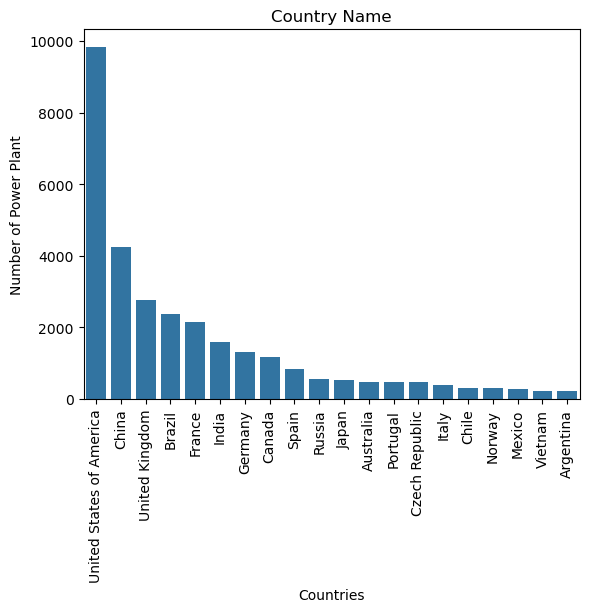

In [29]:
sns.barplot(x = countries_plant.index, y = countries_plant)
plt.xticks(rotation = 90)
plt.title('Country Name')
plt.ylabel('Number of Power Plant')
plt.xlabel('Countries');

In [30]:
fuel=df['primary_fuel'].value_counts()
fuel

Solar             10665
Hydro              7156
Wind               5344
Gas                3998
Coal               2330
Oil                2320
Biomass            1430
Waste              1068
Nuclear             195
Geothermal          189
Storage             135
Other                43
Cogeneration         41
Petcoke              12
Wave and Tidal       10
Name: primary_fuel, dtype: int64

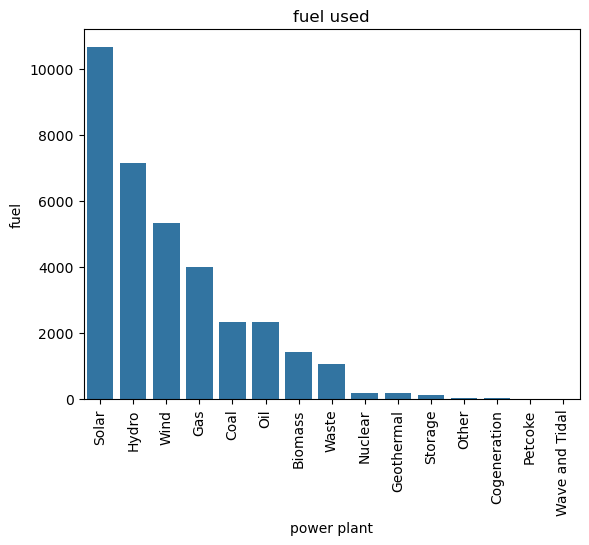

In [32]:
sns.barplot(x = fuel.index, y = fuel)
plt.xticks(rotation = 90)
plt.title('fuel used')
plt.ylabel('fuel')
plt.xlabel('power plant');

Text(0.5, 1.0, 'Type of power plant and capacity')

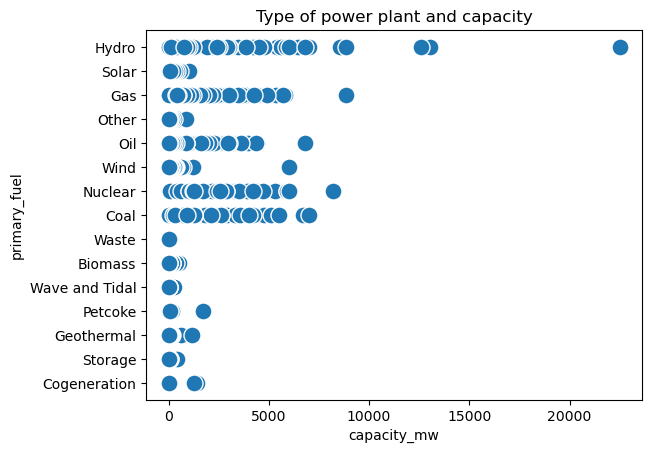

In [33]:
sns.scatterplot(x =df.capacity_mw, y = df.primary_fuel, s = 150)
plt.title('Type of power plant and capacity')

In [39]:
# top 20 countries with highest power generating capacity
countries_capacity = df.groupby('country_long')[['capacity_mw']].sum().sort_values('capacity_mw', ascending = False).head(20)
countries_capacity

,capacity_mw
country_long,
China,1.415067e+06
United States of America,1.204638e+06
India,3.160885e+05
Russia,2.282200e+05
Japan,2.153659e+05
Brazil,1.475893e+05
Canada,1.435787e+05
Germany,1.120404e+05
France,1.106159e+05


Text(0.5, 1.0, 'Countries with capacity')

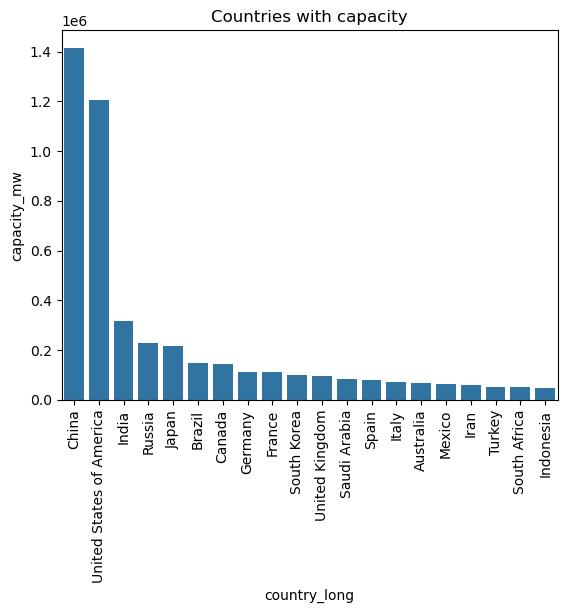

In [38]:
sns.barplot(x = countries_capacity.index, y = countries_capacity.capacity_mw)
plt.xticks(rotation = 90)
plt.title('Countries with capacity')

Text(0.5, 1.0, 'Countries with capacity')

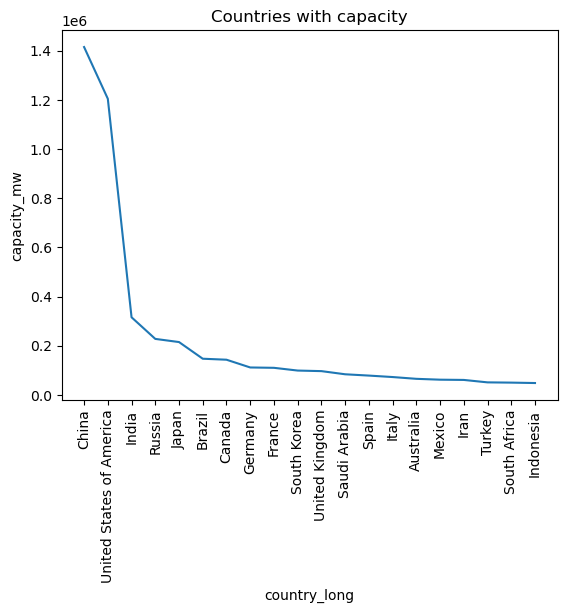

In [40]:
sns.lineplot(x = countries_capacity.index, y = countries_capacity.capacity_mw)
plt.xticks(rotation = 90)
plt.title('Countries with capacity')

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U9'), dtype('float64')) -> None

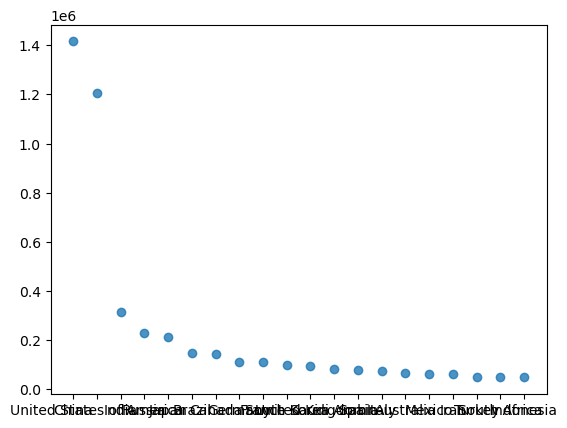